# Lab 3

Noah Kim

Section AC

### Problem 1

In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', size=22)
matplotlib.rc('figure', figsize=(18, 10))
import numpy as np
import pandas as pd
from scipy import stats, signal

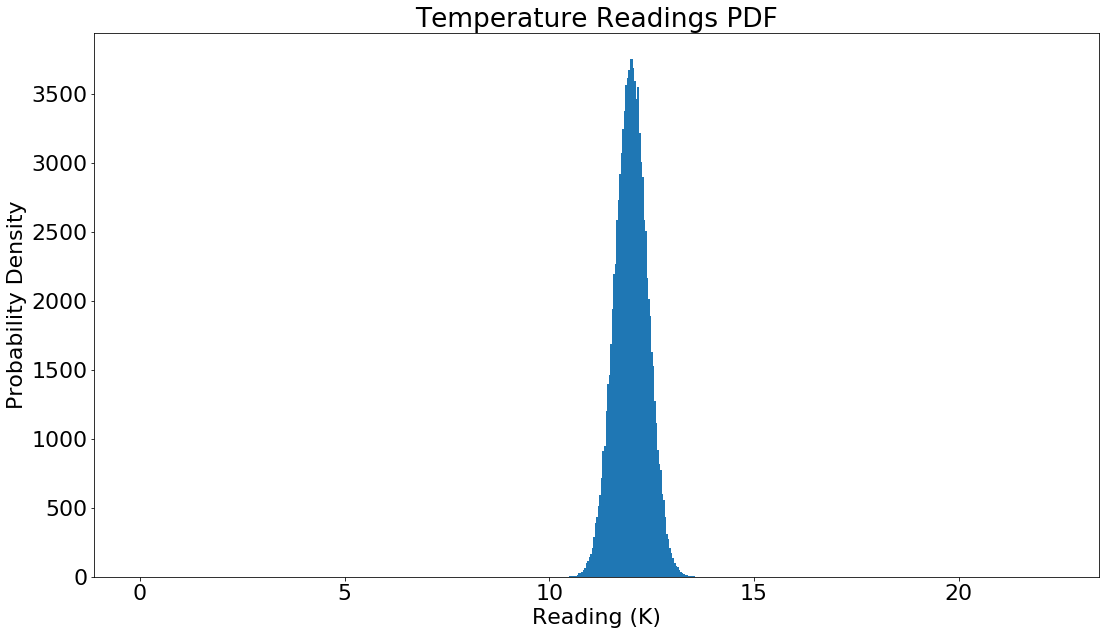

In [49]:
mean, sd = 12, 0.4
good_readings = stats.norm(mean, sd).rvs(100000)
bad_readings = np.array([10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
readings = np.concatenate((good_readings, bad_readings))
plt.title('Temperature Readings PDF');
plt.xlabel('Reading (K)');
plt.ylabel('Probability Density');
plt.hist(readings, bins= 600);


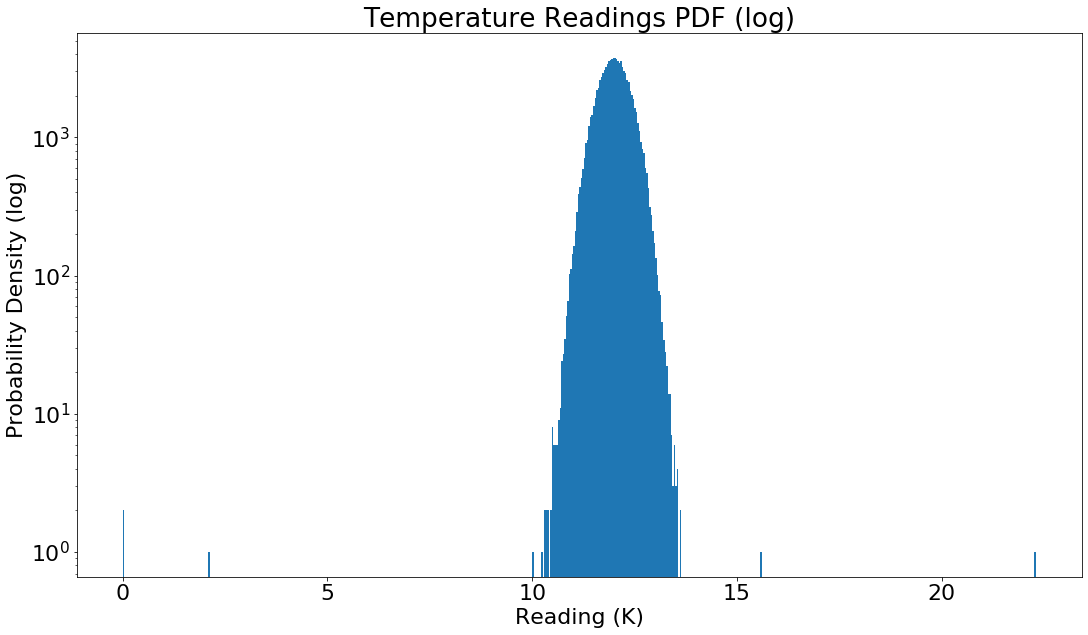

In [51]:
plt.yscale('log');
plt.hist(readings, bins= 600);
plt.title('Temperature Readings PDF (log)');
plt.xlabel('Reading (K)');
plt.ylabel('Probability Density (log)');

**2. State the statistical question in words. Be very clear, and describe why you have chosen this statistical question.**

What is the probability that the temperature data is a probability of 5-sigma above or below the average of 12 Kelvin, in relation to the standard normal distribution. In this case I will consider that this probability above or below the distribution is considered to be anomalously high and low readings, such that they do not reflect the actual temperature of the thermal control system. In an attempt to cleanse my data, I need to identify these wonky values, to then discard them from the data set.

**3. Restate your questin in math. Be very clear.**

The 5 sigma point is representative of a an extremely rare event, such that it only happens once every 3.5million events in a standard normal distribution. For our distribution we want to find the equivalent of a 5 sigma point probability of a stanard normal distribution, and identify where this same probability(as a temperature value) lies in our distribution. I will be identifying the range of valid temperature readings that my data will accept by identifying where this -5 sigma and 5 sigma probability points exist on my distribution. Tossing all outliers below the -5 sigma and above the 5 sigma probability points.

def get_counts(sigma):
    true_kept = good_readings[np.where((good_readings < 12 + sigma * 0.4) & (good_readings > 12 - sigma * 0.4))]
    true_discarded = len(good_readings) - len(true_kept)

    badkept = bad_readings[np.where((bad_readings > 12 - sigma * 0.4) & (bad_readings < 12 + sigma * 0.4))]
    bad_discarded = len(bad_readings) - len(badkept)
    truth_table = pd.DataFrame(np.array([[len(true_kept),len(badkept)],[true_discarded,bad_discarded]]),index = ['Kept','Discarded'], columns=['Good Data', 'Bad Data'])
    print(truth_table)

get_counts(1)

In [116]:
def create_truth (sigma):
    true_kept = good_readings[np.where((good_readings < 12 + sigma * 0.4) & (good_readings > 12 - sigma * 0.4))]
    true_discarded = len(good_readings) - len(true_kept)

    badkept = bad_readings[np.where((bad_readings > 12 - sigma * 0.4) & (bad_readings < 12 + sigma * 0.4))]
    bad_discarded = len(bad_readings) - len(badkept)
    truth_table = pd.DataFrame(np.array([[len(true_kept),len(badkept)],[true_discarded,bad_discarded]]),index = ['Positive','Negative'], columns=['True', 'False'])
    print(truth_table)

create_truth()
create_truth(5)

           True  False
Positive  68225      0
Negative  31775      8
            True  False
Positive  100000      2
Negative       0      6


### Problem 2

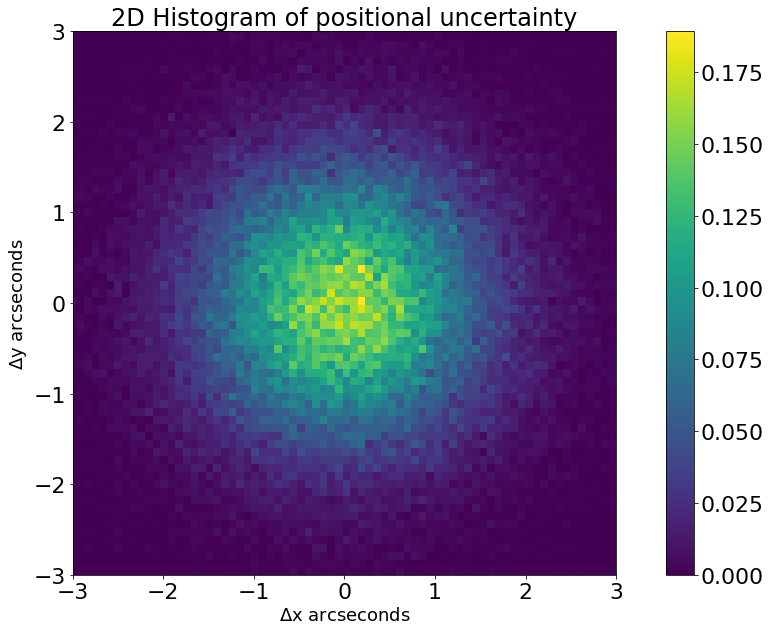

In [126]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

In [ ]:
2d_gaus = stats.norm